In [197]:
import math
from turtle import color
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [198]:
df = pd.read_csv("data/Country-data.csv")
df_data_dic = pd.read_csv("data/data-dictionary.csv")
print(df.to_string())

                            country  child_mort  exports  health   imports  income  inflation  life_expec  total_fer    gdpp
0                       Afghanistan        90.2   10.000    7.58   44.9000    1610      9.440        56.2       5.82     553
1                           Albania        16.6   28.000    6.55   48.6000    9930      4.490        76.3       1.65    4090
2                           Algeria        27.3   38.400    4.17   31.4000   12900     16.100        76.5       2.89    4460
3                            Angola       119.0   62.300    2.85   42.9000    5900     22.400        60.1       6.16    3530
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   19100      1.440        76.8       2.13   12200
5                         Argentina        14.5   18.900    8.10   16.0000   18700     20.900        75.8       2.37   10300
6                           Armenia        18.1   20.800    4.40   45.3000    6700      7.770        73.3       1.69    3220


In [199]:
mean_res = [None]
var_res = [None]
st_dev_res = [None]
for col_name in df.iloc[:, 1:]:
    mean_res.append(np.mean(df[col_name]))
    var_res.append(np.var(df[col_name]))
    st_dev_res.append(np.sqrt(np.var(df[col_name])))

In [200]:
#On crée les nouvelles colonnes pour ajouté de nouvelle donnée au csv
df_data_dic["Mean"] = mean_res
df_data_dic["Variance"] = var_res
df_data_dic["Standard Deviation"] = st_dev_res

print(df_data_dic)
#df_data_dic.to_csv("data/data-dictionary.csv")

   Unnamed: 0 Column Name                                        Description   
0           0     country                                Name of the country  \
1           1  child_mort  Death of children under 5 years of age per 100...   
2           2     exports  Exports of goods and services per capita. Give...   
3           3      health  Total health spending per capita. Given as %ag...   
4           4     imports  Imports of goods and services per capita. Give...   
5           5      Income                              Net income per person   
6           6   Inflation  The measurement of the annual growth rate of t...   
7           7  life_expec  The average number of years a new born child w...   
8           8   total_fer  The number of children that would be born to e...   
9           9        gdpp  The GDP per capita. Calculated as the Total GD...   

           Mean      Variance  Standard Deviation  
0           NaN           NaN                 NaN  
1     38.270060

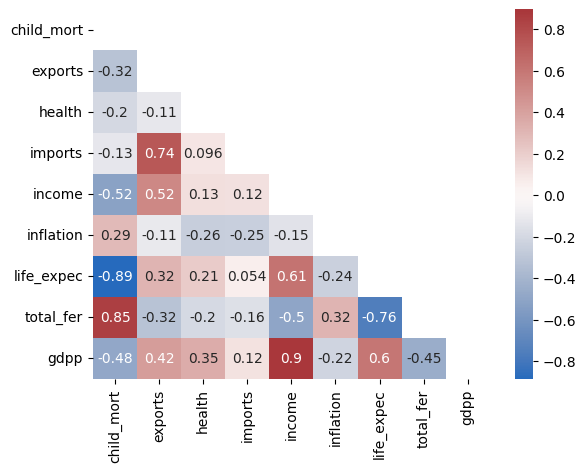

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de corrélation
mat_corr = df.iloc[:, 1:].corr()

# Créer un masque pour la moitié inférieure
mask = np.triu(np.ones_like(mat_corr, dtype=bool))

# Définir une colormap personnalisée
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Créer la heatmap avec le masque et la colormap personnalisée
sns.heatmap(mat_corr, mask=mask, annot=True, cmap="vlag",center=0)

# Afficher la figure
plt.show()


In [202]:


px.histogram(df.sort_values('child_mort',ascending=False), x='country', y='child_mort')

In [207]:
def view_distribution(df,feature,is_ascending):
    px.histogram(df.sort_values(feature,ascending=is_ascending).head(10), x='country', y=feature).show()



In [209]:
view_distribution(df,'exports',False)
